In [32]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import math
from scipy import stats
from matplotlib import pyplot as plt

In [33]:
lambda_truth = 4.0

In [34]:
x_line = np.arange(4 * lambda_truth)

#true_model = np.exp(
#    x_line * np.log(lambda_truth) - [math.lgamma(x + 1) for x in x_line] - lambda_truth
#)


true_model = stats.poisson.pmf(
    k=x_line, 
    mu=lambda_truth,
)

print(np.round(true_model, 3))

[0.018 0.073 0.147 0.195 0.195 0.156 0.104 0.06  0.03  0.013 0.005 0.002
 0.001 0.    0.    0.   ]


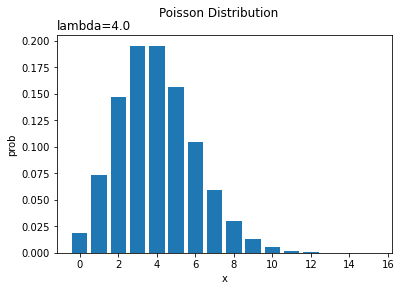

In [35]:
plt.bar(
    x=x_line, 
    height=true_model,
)
plt.xlabel('x')
plt.ylabel('prob')
plt.suptitle('Poisson Distribution')
plt.title(
    f'lambda={lambda_truth}', 
    loc='left',
)
plt.show()

In [36]:
N = 50
x_n = np.random.poisson(lam=lambda_truth, size=N)

print(x_n[:10])

[4 3 5 5 1 2 2 1 6 2]


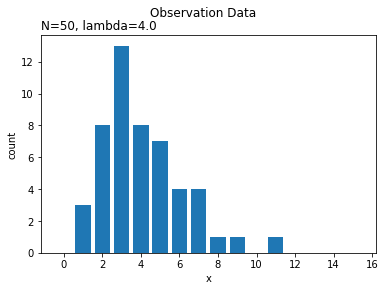

In [37]:
plt.bar(
    x=x_line, 
    height=[np.sum(x_n == x) for x in x_line],
)
plt.xlabel('x')
plt.ylabel('count')
plt.suptitle('Observation Data')
plt.title(
    f'N={N}, lambda={lambda_truth}', 
    loc='left',
)
plt.show()

In [38]:
a = 1
b = 1

In [39]:
lambda_line = np.arange(0, 2 * lambda_truth, 0.001)

#ln_C_gam = a * np.log(b) - math.lgamma(a)
#prior = np.exp(ln_C_gam + (a - 1) * np.log(lambda_line) - b * lambda_line)

prior = stats.gamma.pdf(
    x=lambda_line, 
    a=a, 
    scale=1/b,
)

print(np.round(prior, 3))

[1.    0.999 0.998 ... 0.    0.    0.   ]


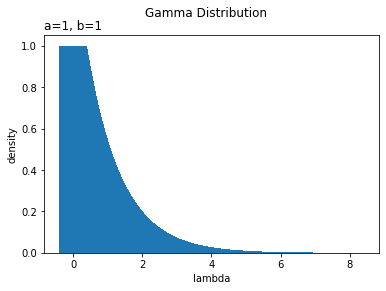

In [41]:
plt.bar(
    x=lambda_line, 
    height=prior,
)
plt.xlabel('lambda')
plt.ylabel('density')
plt.suptitle('Gamma Distribution')
plt.title(
    f'a={a}, b={b}', 
    loc='left',
)
plt.show()

In [42]:
a_hat = np.sum(x_n) + a
b_hat = N + b

print(a_hat)
print(b_hat)

206
51
